In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import pathlib
import seaborn as sns
import pandas as pd
sns.set_context('talk')
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path_list = [
    # "/storage/vbutoi/scratch/ESE/training/08_24_24_HeptaticVessel_LowerLR",
    # "/storage/vbutoi/scratch/ESE/training/08_26_24_HepaticVessel_wSVLS_LONGTRAINING",
    # "/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_TempScaling",
    "/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS",
]

df_list = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list.append(df)
    except Exception as e:
        print(e)
df = pd.concat(df_list)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [3]:
for ikey in df.keys():
    print(ikey)

phase
epoch
loss
area_estimation_error
dice_score
ece_loss
data
iters_per_epoch
label
resolution
root_folder
task
train_splits
val_splits
batch_size
num_workers
pin_memory
seed
loss_func
batch_reduction
from_logits
model
filters
image_channels
img_channels
num_classes
optim
lr
weight_decay
base_checkpoint
base_pretrained_dir
base_pt_select_metric
epochs
eval_freq
path


In [4]:
def calibrator(path):
    if 'SVLS' in str(path):
        return 'SVLS'
    else:
        return 'None'
    
df.augment(calibrator)

In [5]:
df['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150527-102S-5f7b83e60c1730e2a88af7ef7d33c207'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150544-IQWK-1bd2d67b15d2ccec39897ac966b13b94'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_151250-5SMY-f3f954147b4a4e0686188da09ab4154a'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150531-TANY-443925f4ecd0e161aad3383ca25c0b66'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150519-E21O-32de2e71734fbe9ee7aa76797f2dd51b'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_151242-MMMD-ef056fdf92cd31d22f94ea015ea745f5'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150540-BCQK-f0b8753fb5ac08d964ad42f46d8fc25c'),

In [6]:
# g = sns.relplot(
#     data=df,
#     x='epoch',
#     y='loss',
#     hue='path',
#     style='seed',   
#     col='phase',
#     row='loss_func',
#     kind='line',
#     height=12,
# )

# # Set column spacing
# g.fig.subplots_adjust(wspace=0.05)
# # g.set(ylim=(0.0, 0.25))

In [7]:
df.select(loss_func='ese.losses.PixelCELoss')['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150527-102S-5f7b83e60c1730e2a88af7ef7d33c207'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150544-IQWK-1bd2d67b15d2ccec39897ac966b13b94'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150531-TANY-443925f4ecd0e161aad3383ca25c0b66'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150519-E21O-32de2e71734fbe9ee7aa76797f2dd51b'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150540-BCQK-f0b8753fb5ac08d964ad42f46d8fc25c'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150523-9FAV-49b866247d491187a5ba83d96cc73224'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_26_24_HepaticVessels_LTS/20240826_150514-VC99-64d35a2cec17303f8fcf66af0555fd49'),

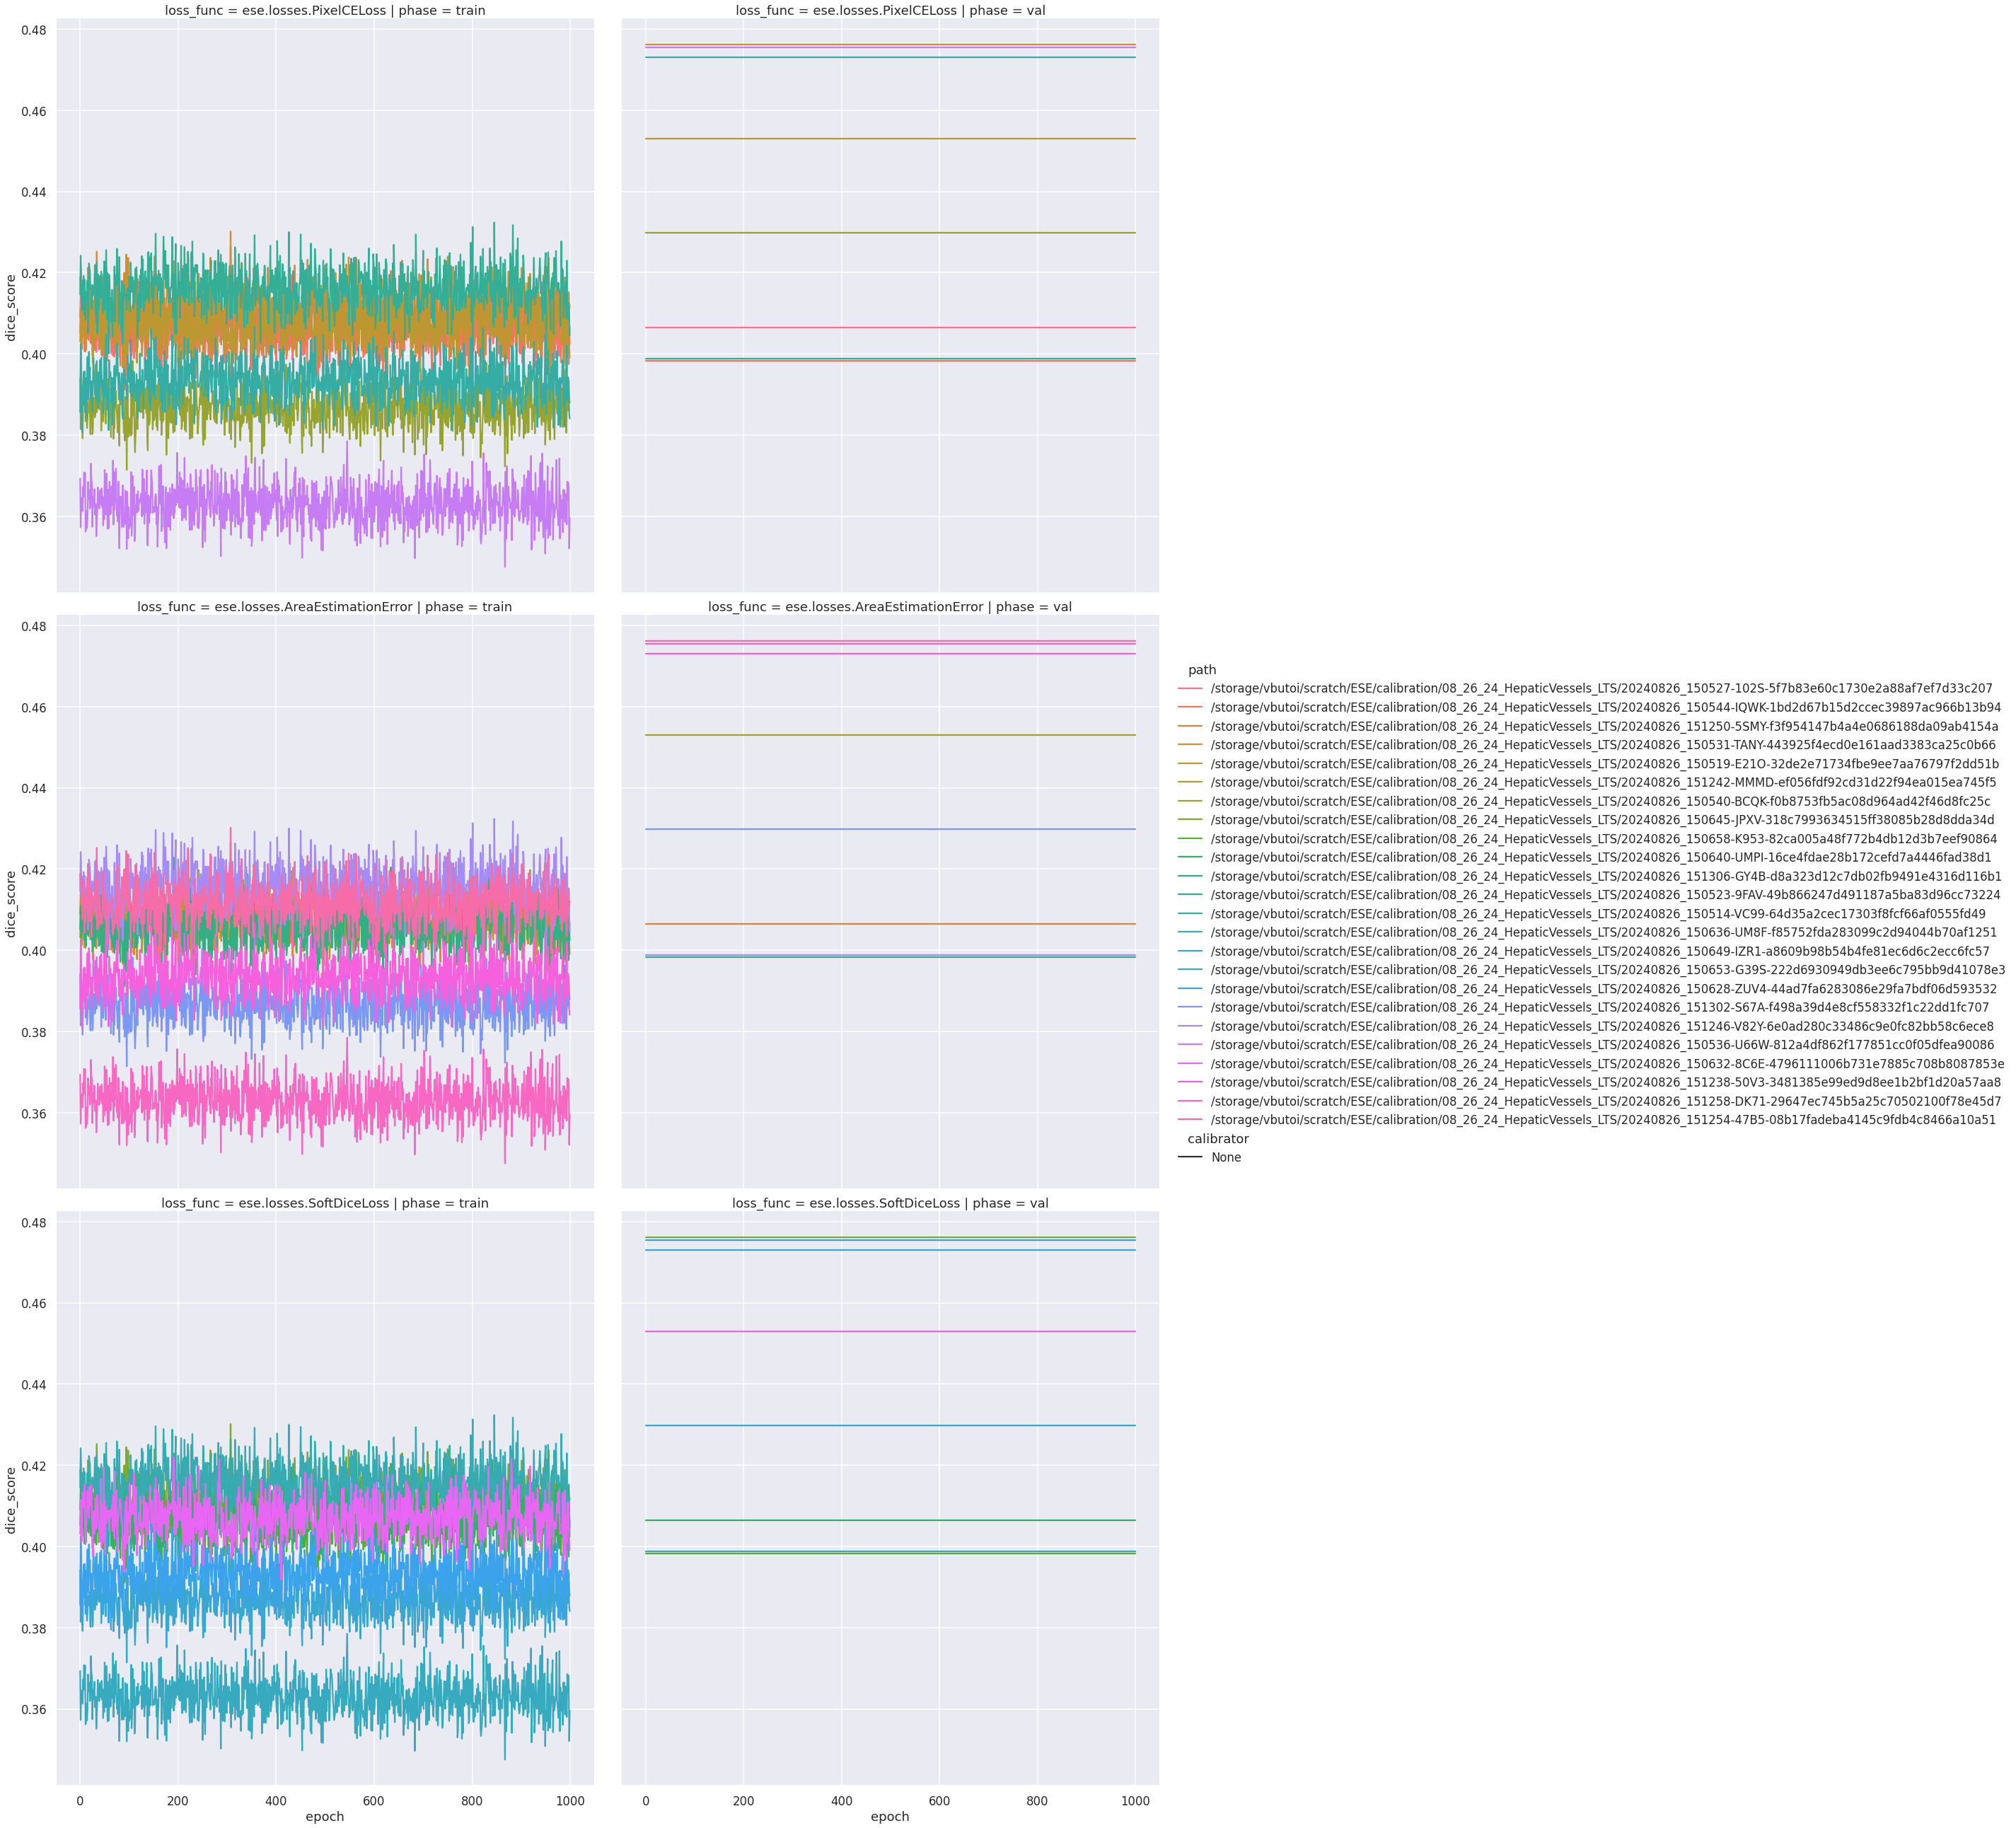

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    hue='path',
    style='calibrator',
    row='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

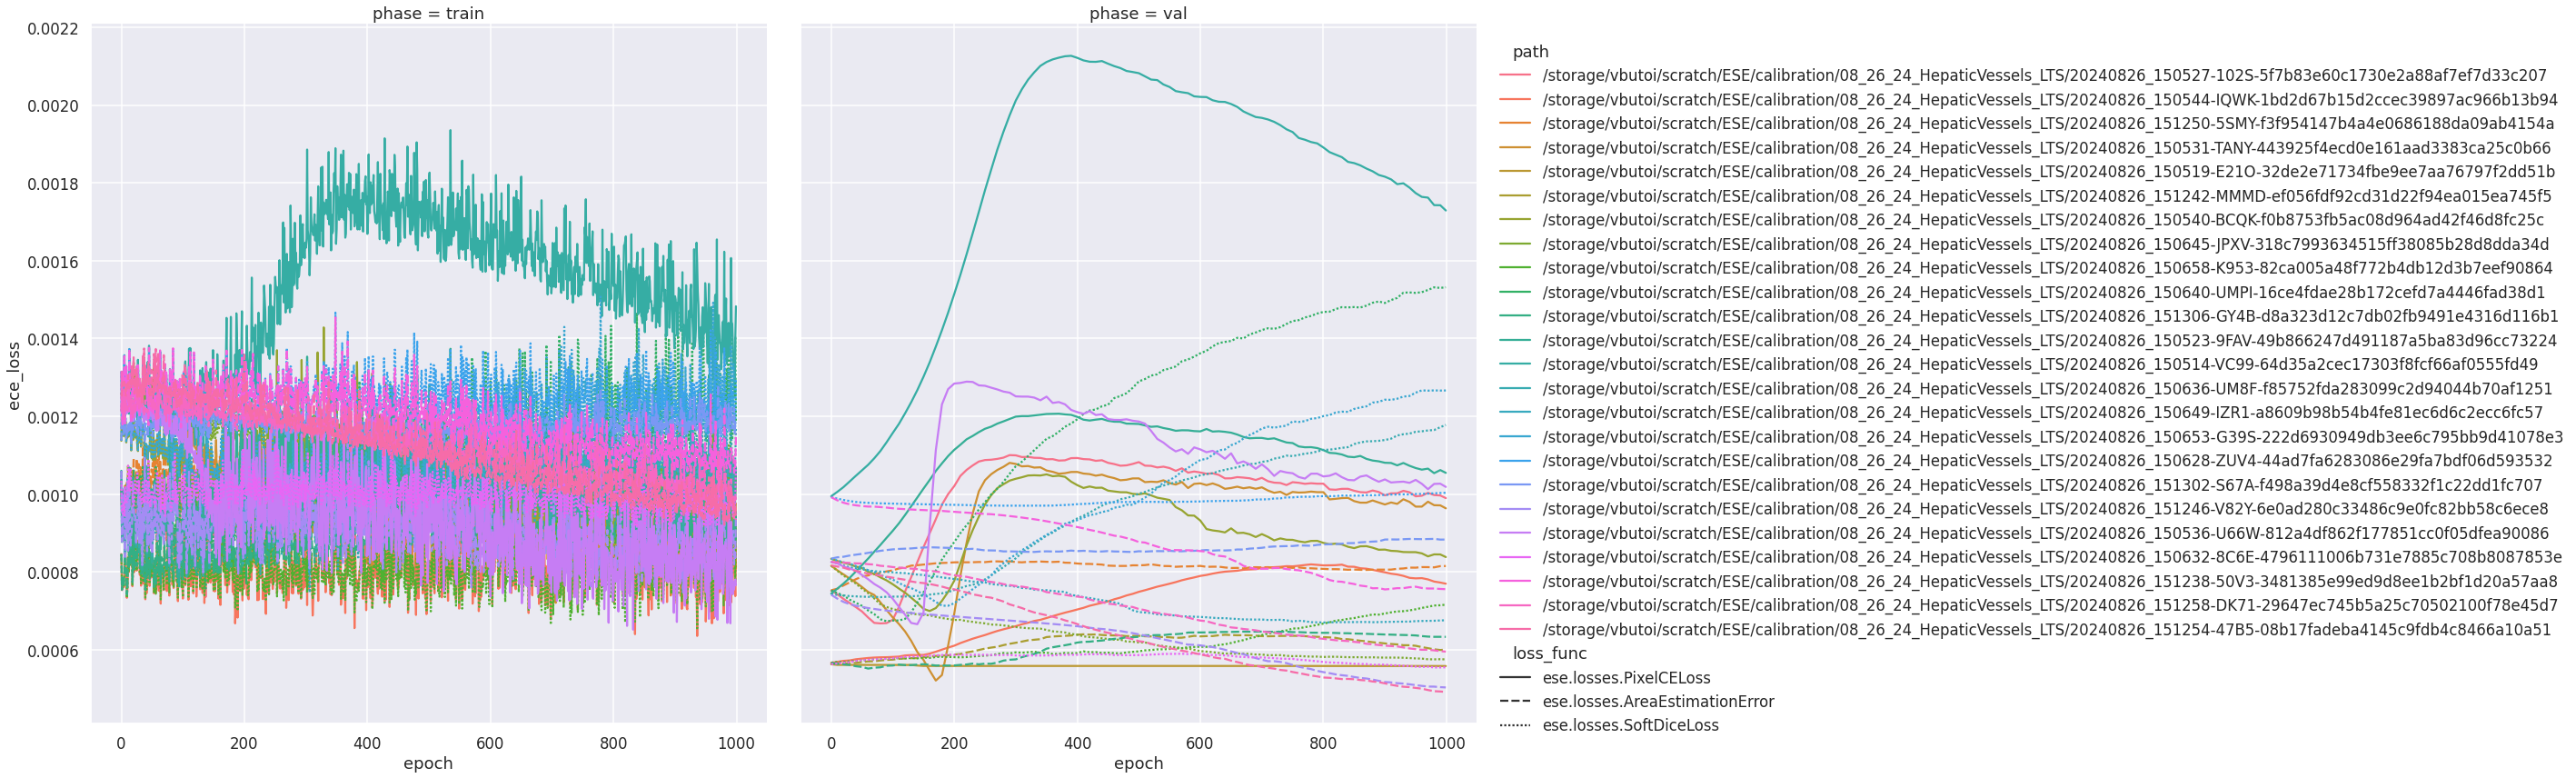

In [9]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

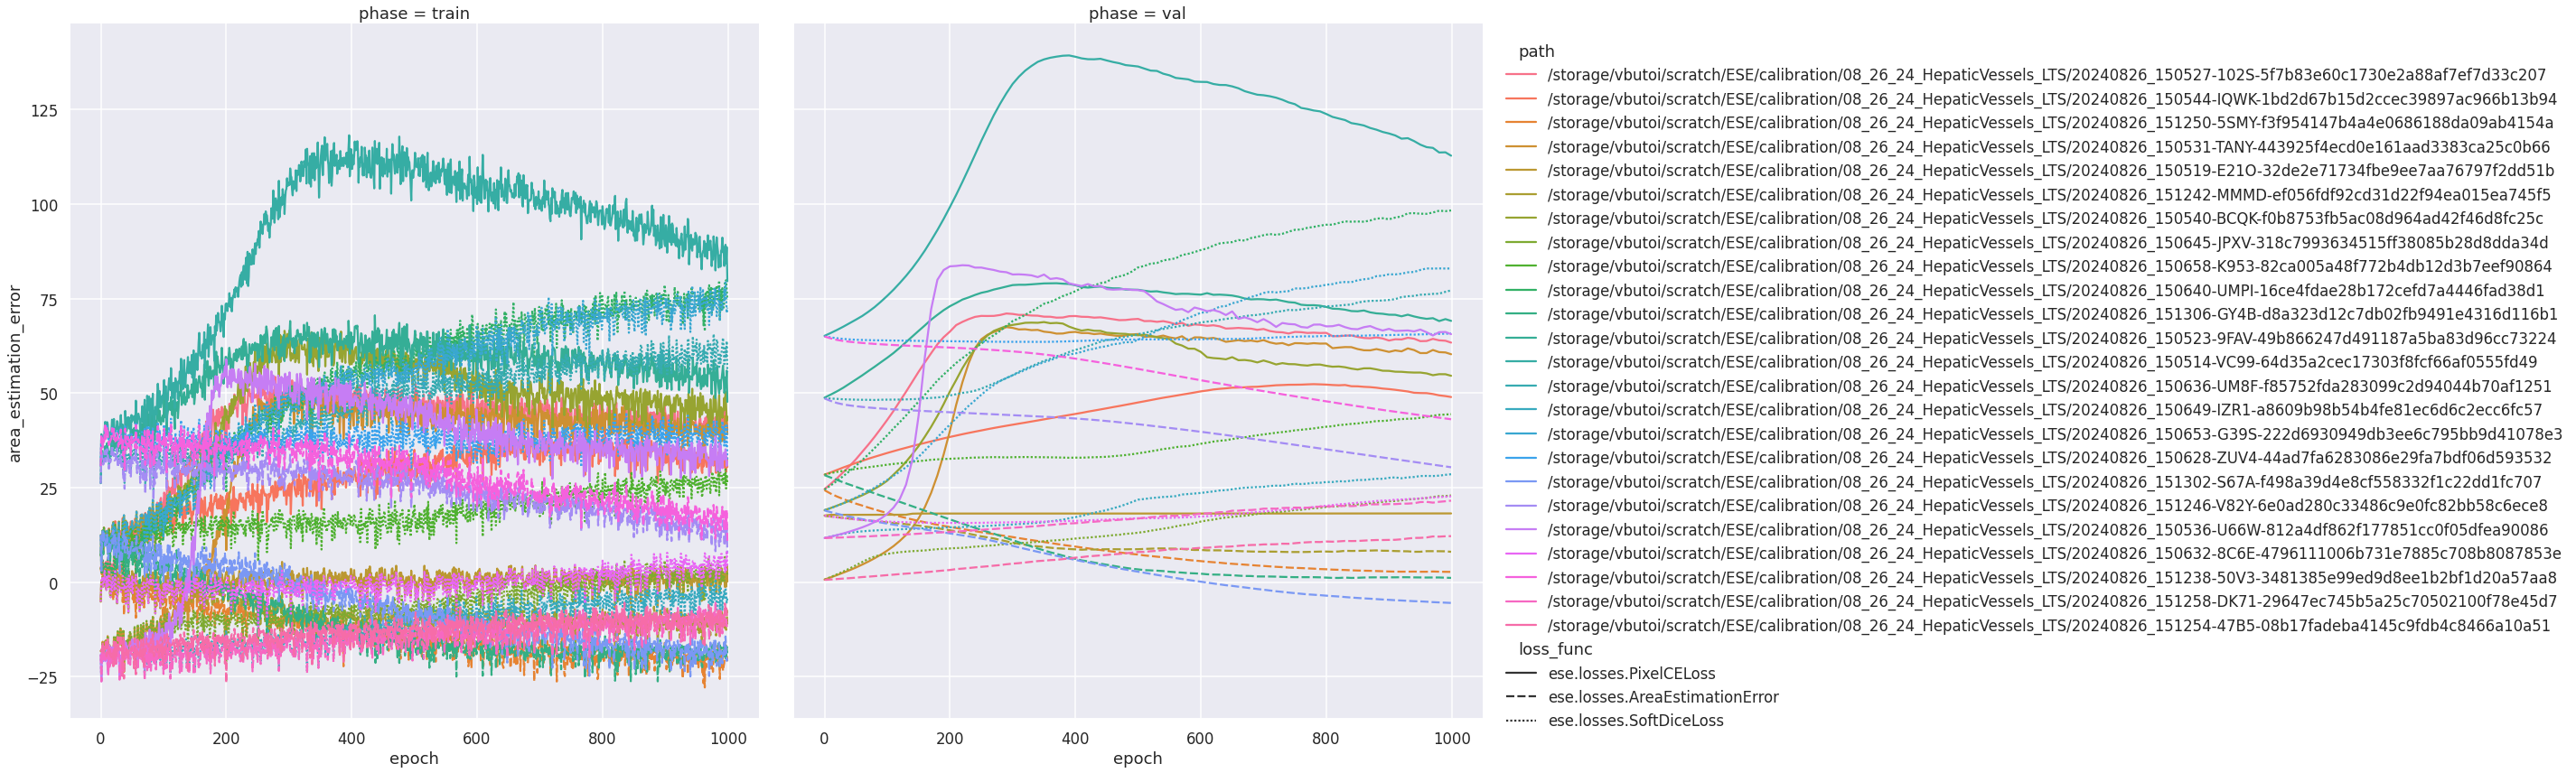

In [10]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='area_estimation_error',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))